## Real data
- Number of contigs with nucmer alignments
- Longest contig with nucmer alignment

## Simulated data
- Longest contig
- Number of contigs

In [1]:
import os
import sys

from Bio import SeqIO

import pandas as pd

from pymummer import coords_file, alignment, nucmer

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
def longest_record_len(path):
    '''Returns SeqRecord of longest sequence inside `contigs.fasta` files in a specified directory'''
    longest_len = 0
    records = SeqIO.parse(path, 'fasta')
    for record in records:
        if len(record.seq) > longest_len:
            longest_id = record.id
            longest_len = len(record.seq)
            longest_assembly = path
            longest_record = record
            longest_record.description = path
    
    return longest_len

## Simulated data

In [29]:
path = '/Users/bede/Research/Notebooks/res/2017-09-03/norm_asm_bench/asm/'

In [30]:
contig_ids_fns = {fn[4:]: fn + '/contigs.fasta' for fn in os.listdir(path) if fn.startswith('h77')}

In [45]:
ids_longest = {}
for id, fn in contig_ids_fns.items():
    ids_longest[id] = longest_record_len(path + fn) if os.path.exists(path + fn) else 0
ids_longest

{'e0.02_d10000_r1': 9646,
 'e0.02_d10000_r10': 9646,
 'e0.02_d10000_r10_c128_k32': 9647,
 'e0.02_d10000_r10_c16_k32': 9647,
 'e0.02_d10000_r10_c1_k32': 0,
 'e0.02_d10000_r10_c2_k32': 9647,
 'e0.02_d10000_r10_c32_k32': 9647,
 'e0.02_d10000_r10_c4_k32': 9647,
 'e0.02_d10000_r10_c64_k32': 9647,
 'e0.02_d10000_r10_c8_k32': 9612,
 'e0.02_d10000_r1_c128_k32': 9646,
 'e0.02_d10000_r1_c16_k32': 9646,
 'e0.02_d10000_r1_c1_k32': 0,
 'e0.02_d10000_r1_c2_k32': 7333,
 'e0.02_d10000_r1_c32_k32': 9646,
 'e0.02_d10000_r1_c4_k32': 9646,
 'e0.02_d10000_r1_c64_k32': 9646,
 'e0.02_d10000_r1_c8_k32': 9646,
 'e0.02_d10000_r2': 9646,
 'e0.02_d10000_r2_c128_k32': 9646,
 'e0.02_d10000_r2_c16_k32': 9646,
 'e0.02_d10000_r2_c1_k32': 0,
 'e0.02_d10000_r2_c2_k32': 7017,
 'e0.02_d10000_r2_c32_k32': 9646,
 'e0.02_d10000_r2_c4_k32': 9630,
 'e0.02_d10000_r2_c64_k32': 9646,
 'e0.02_d10000_r2_c8_k32': 9646,
 'e0.02_d10000_r3': 9647,
 'e0.02_d10000_r3_c128_k32': 9646,
 'e0.02_d10000_r3_c16_k32': 9646,
 'e0.02_d10000_r3_c1

### Longest contigs from unnormalised and normalised for each simulated population

In [66]:
sim_ids = [k for k, v in ids_longest.items() if '_r' in k[-4:]]
sim_ids

ids_virgin_normbest = {}
for sim_id in sim_ids:
    virgin = None
    norm_longest = 0
    for id, longest in ids_longest.items():
        if id == sim_id:
            virgin = longest
        elif sim_id in id:
            if longest > norm_longest:
                norm_longest = longest
    ids_virgin_normbest[sim_id] = (virgin, norm_longest)
ids_virgin_normbest

{'e0.02_d10000_r1': (9646, 9647),
 'e0.02_d10000_r10': (9646, 9647),
 'e0.02_d10000_r2': (9646, 9646),
 'e0.02_d10000_r3': (9647, 9646),
 'e0.02_d10000_r4': (9646, 9646),
 'e0.02_d10000_r5': (9646, 9649),
 'e0.02_d10000_r6': (9649, 9649),
 'e0.02_d10000_r7': (9646, 9646),
 'e0.02_d10000_r8': (9647, 9647),
 'e0.02_d10000_r9': (9647, 9647),
 'e0.04_d10000_r1': (9645, 9647),
 'e0.04_d10000_r10': (9646, 9647),
 'e0.04_d10000_r2': (9649, 9649),
 'e0.04_d10000_r3': (9649, 9649),
 'e0.04_d10000_r4': (9647, 9646),
 'e0.04_d10000_r5': (9647, 9652),
 'e0.04_d10000_r6': (9646, 9650),
 'e0.04_d10000_r7': (9648, 9646),
 'e0.04_d10000_r8': (9646, 9647),
 'e0.04_d10000_r9': (9647, 9647),
 'e0.06_d10000_r1': (9637, 9647),
 'e0.06_d10000_r10': (9647, 9647),
 'e0.06_d10000_r2': (9646, 9644),
 'e0.06_d10000_r3': (9647, 9647),
 'e0.06_d10000_r4': (9645, 9648),
 'e0.06_d10000_r5': (9646, 9646),
 'e0.06_d10000_r6': (9646, 9646),
 'e0.06_d10000_r7': (9647, 9647),
 'e0.06_d10000_r8': (9642, 9646),
 'e0.06_d10

In [70]:
len(ids_virgin_normbest)

110

In [68]:
for id, (virgin, normbest) in ids_virgin_normbest.items():
    if normbest > (virgin):
        print(id)

e0.02_d10000_r1
e0.02_d10000_r10
e0.02_d10000_r5
e0.04_d10000_r1
e0.04_d10000_r10
e0.04_d10000_r5
e0.04_d10000_r6
e0.04_d10000_r8
e0.06_d10000_r1
e0.06_d10000_r4
e0.06_d10000_r8
e0.06_d10000_r9
e0.08_d10000_r4
e0.08_d10000_r8
e0.08_d10000_r9
e0.12_d10000_r1
e0.1_d10000_r1
e0.1_d10000_r3


In [72]:
for id, (virgin, normbest) in ids_virgin_normbest.items():
    if normbest > (virgin+virgin/1000):
        print(id, virgin, normbest)

e0.06_d10000_r1 9637 9647
e0.12_d10000_r1 0 8052
e0.1_d10000_r1 6140 8149


# 3/110 significantly longer without normalisation --> 0.02727…

In [36]:
# unnormalised
{k: v for k, v in ids_longest.items() if '_r' in k[-4:]}

{'e0.02_d10000_r1': 9646,
 'e0.02_d10000_r10': 9646,
 'e0.02_d10000_r2': 9646,
 'e0.02_d10000_r3': 9647,
 'e0.02_d10000_r4': 9646,
 'e0.02_d10000_r5': 9646,
 'e0.02_d10000_r6': 9649,
 'e0.02_d10000_r7': 9646,
 'e0.02_d10000_r8': 9647,
 'e0.02_d10000_r9': 9647,
 'e0.04_d10000_r1': 9645,
 'e0.04_d10000_r10': 9646,
 'e0.04_d10000_r2': 9649,
 'e0.04_d10000_r3': 9649,
 'e0.04_d10000_r4': 9647,
 'e0.04_d10000_r5': 9647,
 'e0.04_d10000_r6': 9646,
 'e0.04_d10000_r7': 9648,
 'e0.04_d10000_r8': 9646,
 'e0.04_d10000_r9': 9647,
 'e0.06_d10000_r1': 9637,
 'e0.06_d10000_r10': 9647,
 'e0.06_d10000_r2': 9646,
 'e0.06_d10000_r3': 9647,
 'e0.06_d10000_r4': 9645,
 'e0.06_d10000_r5': 9646,
 'e0.06_d10000_r6': 9646,
 'e0.06_d10000_r7': 9647,
 'e0.06_d10000_r8': 9642,
 'e0.06_d10000_r9': 9646,
 'e0.08_d10000_r1': 9651,
 'e0.08_d10000_r10': 9646,
 'e0.08_d10000_r2': 9644,
 'e0.08_d10000_r3': 9646,
 'e0.08_d10000_r4': 9647,
 'e0.08_d10000_r5': 9640,
 'e0.08_d10000_r6': 9645,
 'e0.08_d10000_r7': 9648,
 'e0.08_

In [16]:
{k: v for k, v in ids_longest.items() if 'c128'}

{'e0.02_d10000_r10_c128_k32': 9647,
 'e0.02_d10000_r1_c128_k32': 9646,
 'e0.02_d10000_r2_c128_k32': 9646,
 'e0.02_d10000_r3_c128_k32': 9646,
 'e0.02_d10000_r4_c128_k32': 9646,
 'e0.02_d10000_r5_c128_k32': 9649,
 'e0.02_d10000_r6_c128_k32': 9649,
 'e0.02_d10000_r7_c128_k32': 9646,
 'e0.02_d10000_r8_c128_k32': 9647,
 'e0.02_d10000_r9_c128_k32': 9647,
 'e0.04_d10000_r10_c128_k32': 9646,
 'e0.04_d10000_r1_c128_k32': 9642,
 'e0.04_d10000_r2_c128_k32': 9646,
 'e0.04_d10000_r3_c128_k32': 9649,
 'e0.04_d10000_r4_c128_k32': 9646,
 'e0.04_d10000_r5_c128_k32': 9652,
 'e0.04_d10000_r6_c128_k32': 9650,
 'e0.04_d10000_r7_c128_k32': 9646,
 'e0.04_d10000_r8_c128_k32': 9646,
 'e0.04_d10000_r9_c128_k32': 9647,
 'e0.06_d10000_r10_c128_k32': 9647,
 'e0.06_d10000_r1_c128_k32': 9645,
 'e0.06_d10000_r2_c128_k32': 9644,
 'e0.06_d10000_r3_c128_k32': 9645,
 'e0.06_d10000_r4_c128_k32': 9648,
 'e0.06_d10000_r5_c128_k32': 9646,
 'e0.06_d10000_r6_c128_k32': 9643,
 'e0.06_d10000_r7_c128_k32': 9647,
 'e0.06_d10000_r8

In [18]:
{k: v for k, v in ids_longest.items() if 'e0.1_' in k}

{'e0.1_d10000_r1': 6140,
 'e0.1_d10000_r10': 8149,
 'e0.1_d10000_r10_c128_k32': 5107,
 'e0.1_d10000_r10_c16_k32': None,
 'e0.1_d10000_r10_c1_k32': None,
 'e0.1_d10000_r10_c2_k32': None,
 'e0.1_d10000_r10_c32_k32': None,
 'e0.1_d10000_r10_c4_k32': None,
 'e0.1_d10000_r10_c64_k32': 5107,
 'e0.1_d10000_r10_c8_k32': None,
 'e0.1_d10000_r1_c128_k32': 6104,
 'e0.1_d10000_r1_c16_k32': None,
 'e0.1_d10000_r1_c1_k32': None,
 'e0.1_d10000_r1_c2_k32': None,
 'e0.1_d10000_r1_c32_k32': 6155,
 'e0.1_d10000_r1_c4_k32': None,
 'e0.1_d10000_r1_c64_k32': 6089,
 'e0.1_d10000_r1_c8_k32': None,
 'e0.1_d10000_r2': 5313,
 'e0.1_d10000_r2_c128_k32': 5215,
 'e0.1_d10000_r2_c16_k32': None,
 'e0.1_d10000_r2_c1_k32': None,
 'e0.1_d10000_r2_c2_k32': None,
 'e0.1_d10000_r2_c32_k32': None,
 'e0.1_d10000_r2_c4_k32': None,
 'e0.1_d10000_r2_c64_k32': 5168,
 'e0.1_d10000_r2_c8_k32': None,
 'e0.1_d10000_r3': 9646,
 'e0.1_d10000_r3_c128_k32': 9570,
 'e0.1_d10000_r3_c16_k32': None,
 'e0.1_d10000_r3_c1_k32': None,
 'e0.1_d1

## Simulated `--careful` (partial)

In [19]:
path = '/Users/bede/Research/Notebooks/res/2017-09-03/norm_asm_bench/asm_careful/'

In [20]:
contig_ids_fns = {fn[4:]: fn + '/contigs.fasta' for fn in os.listdir(path) if fn.startswith('h77')}
contig_ids_fns

{'e0.02_d10000_r10_c128_k32': 'h77_e0.02_d10000_r10_c128_k32/contigs.fasta',
 'e0.02_d10000_r10_c16_k32': 'h77_e0.02_d10000_r10_c16_k32/contigs.fasta',
 'e0.02_d10000_r10_c1_k32': 'h77_e0.02_d10000_r10_c1_k32/contigs.fasta',
 'e0.02_d10000_r10_c2_k32': 'h77_e0.02_d10000_r10_c2_k32/contigs.fasta',
 'e0.02_d10000_r10_c32_k32': 'h77_e0.02_d10000_r10_c32_k32/contigs.fasta',
 'e0.02_d10000_r10_c4_k32': 'h77_e0.02_d10000_r10_c4_k32/contigs.fasta',
 'e0.02_d10000_r10_c64_k32': 'h77_e0.02_d10000_r10_c64_k32/contigs.fasta',
 'e0.02_d10000_r10_c8_k32': 'h77_e0.02_d10000_r10_c8_k32/contigs.fasta',
 'e0.02_d10000_r1_c128_k32': 'h77_e0.02_d10000_r1_c128_k32/contigs.fasta',
 'e0.02_d10000_r1_c16_k32': 'h77_e0.02_d10000_r1_c16_k32/contigs.fasta',
 'e0.02_d10000_r1_c1_k32': 'h77_e0.02_d10000_r1_c1_k32/contigs.fasta',
 'e0.02_d10000_r1_c2_k32': 'h77_e0.02_d10000_r1_c2_k32/contigs.fasta',
 'e0.02_d10000_r1_c32_k32': 'h77_e0.02_d10000_r1_c32_k32/contigs.fasta',
 'e0.02_d10000_r1_c4_k32': 'h77_e0.02_d1000

In [21]:
def longest_record_len(path):
    '''Returns SeqRecord of longest sequence inside `contigs.fasta` files in a specified directory'''
    longest_len = 0
    records = SeqIO.parse(path, 'fasta')
    for record in records:
        if len(record.seq) > longest_len:
            longest_id = record.id
            longest_len = len(record.seq)
            longest_assembly = path
            longest_record = record
            longest_record.description = path
    
    return longest_len

In [ ]:
def fetch_contig_paths:(path):
    

## Real data

In [4]:
path = '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out'

In [6]:
ids_dirs = {fn.partition('_')[0]: path + '/' +  fn for fn in os.listdir(path) if not fn.startswith('.')}

### Contig counts

In [7]:
def fetch_contig_lengths_multiple(asm_id, assembly_root):
    assembly_pars_paths = {}
    for root, dirs, fns in os.walk(assembly_root):
        for fn in fns:
            if fn == 'contigs.fasta':
                norm_status = root.rpartition('/')[2].split('.')[2].replace('norm_', '').replace('no_norm', 'none')
                if not norm_status.startswith('k21'):
                    if norm_status.startswith('k'):
                        norm_status = norm_status[3:]
                    assembly_pars_paths[norm_status] = os.path.join(root, fn)             
#                 norm_status = root.rpartition('/')[2].split('.')[2]
#                 assembly_pars_paths[norm_status] = os.path.join(root, fn)
        
    pars_counts = {}
    for asm_par, asm_path in assembly_pars_paths.items():
        seqs = list(SeqIO.parse(asm_path, 'fasta'))
        pars_counts[asm_par] = len(seqs)
    pars_counts['id'] = asm_id
        
    return pars_counts



contig_counts = []
for asm_id, asm_dir in ids_dirs.items():
    contig_counts.append(fetch_contig_lengths_multiple(asm_id, asm_dir + '/asm'))
contig_counts

[{'c1': 186, 'c10': 189, 'c100': 196, 'id': 'g10', 'none': 8404},
 {'c1': 931, 'c10': 1017, 'c100': 1015, 'id': 'g1', 'none': 1020},
 {'c1': 1260, 'c10': 1352, 'c100': 1358, 'id': 'g2', 'none': 1990},
 {'c1': 597, 'c10': 545, 'c100': 1648, 'id': 'g3', 'none': 2228},
 {'c1': 1766, 'c10': 3456, 'c100': 139, 'id': 'g4', 'none': 227},
 {'c1': 177, 'c10': 664, 'c100': 2865, 'id': 'g5', 'none': 7072},
 {'c1': 713, 'c10': 258, 'c100': 327, 'id': 'g6', 'none': 371},
 {'c1': 618, 'c10': 842, 'c100': 4594, 'id': 'g7', 'none': 406},
 {'c1': 980, 'c10': 258, 'c100': 257, 'id': 'g8', 'none': 578},
 {'c1': 45, 'c10': 192, 'c100': 1140, 'id': 'g9', 'none': 475},
 {'c1': 2250, 'c10': 2167, 'c100': 2249, 'id': 'o10', 'none': 2361},
 {'c1': 1546, 'c10': 1557, 'c100': 1549, 'id': 'o1', 'none': 1549},
 {'c1': 860, 'c10': 857, 'c100': 880, 'id': 'o2', 'none': 874},
 {'c1': 1233, 'c10': 1248, 'c100': 1256, 'id': 'o3', 'none': 1244},
 {'c1': 1131, 'c10': 1249, 'c100': 1509, 'id': 'o4', 'none': 2029},
 {'c1':

In [8]:
df = pd.DataFrame(contig_counts, columns=['id', 'none', 'c100', 'c10', 'c1'])
df.set_index('id')

# pd.DataFrame(contig_counts).melt(var_name='approach', value_name='rcov')


,none,c100,c10,c1
id,,,,
g10,8404,196,189,186
g1,1020,1015,1017,931
g2,1990,1358,1352,1260
g3,2228,1648,545,597
g4,227,139,3456,1766
g5,7072,2865,664,177
g6,371,327,258,713
g7,406,4594,842,618
g8,578,257,258,980


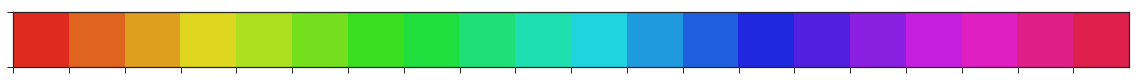

In [55]:
sns.set_style('ticks')
pal_hsl = sns.hls_palette(20, l=.5, s=.75)
sns.palplot(pal_hsl)

[<matplotlib.text.Text at 0x112851240>, <matplotlib.text.Text at 0x111e508d0>]

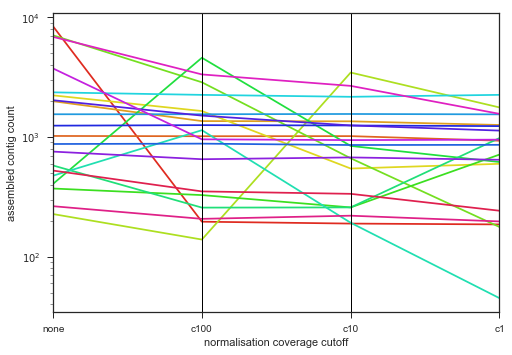

In [56]:
ax = pd.plotting.parallel_coordinates(df, 'id', color=pal_hsl)
ax.legend_.remove()
# ax.set(ylabel='Longest assembled HCV contig')
ax.grid(False)
plt.yscale('log')
ax.set(xlabel='normalisation coverage cutoff', ylabel='assembled contig count')

### Longest contig lengths

In [34]:
def longest_hcv_record_from_multiple_assemblies(assembly_root):
    '''Returns SeqRecord of longest sequence inside `contigs.fasta` files in a specified directory'''
    assembly_pars_paths = {}
    for root, dirs, fns in os.walk(assembly_root):
        for fn in fns:
            if fn == 'contigs.fasta':
                norm_status = root.rpartition('/')[2].split('.')[2]
                assembly_pars_paths[norm_status] = os.path.join(root, fn)
    
    longest_norm = 0
    longest_par = None
    longest_no_norm = 0
    
    for asm_par, asm_path in assembly_pars_paths.items():
        reference_file = 'res/2017-09-03/h77.fa'
        query_file = asm_path
        results_file = 'res/2017-09-03/nucmer.out.tmp'
        runner = nucmer.Runner(reference_file, query_file, results_file, breaklen=1000) 
        runner.run()
        file_reader = coords_file.reader(results_file)
        alignments = [coord for coord in file_reader if not coord.is_self_hit()]
        for a in alignments:
            if asm_par == 'no_norm' and a.hit_length_ref > longest_no_norm: # wrt *reference* not contig
                longest_no_norm = a.hit_length_ref
            elif a.hit_length_ref > longest_norm:
                longest_norm = a.hit_length_ref
                longest_par = asm_par
    
    if longest_no_norm > longest_norm:
        longest_par = 'no_norm'
    elif longest_no_norm == longest_norm:
        longest_par = 'tie'
    
    return longest_par, longest_no_norm, longest_norm

In [35]:
ids_dirs = {fn.partition('_')[0]: path + '/' +  fn for fn in os.listdir(path) if not fn.startswith('.')}

rows = []
for asm_id, asm_dir in ids_dirs.items():
    rows.append(list((asm_id, *longest_hcv_record_from_multiple_assemblies(asm_dir + '/asm'))))

In [122]:
real = pd.DataFrame(rows, columns=['id', 'best parameters', 'unnormalised', 'best normalised'])
real

,id,best parameters,unnormalised,best normalised
0,g10,norm_k21c100,904,9479
1,g1,tie,241,241
2,g2,tie,423,423
3,g3,norm_k21c100,4595,9405
4,g4,norm_k31c10,2425,3271
5,g5,norm_k21c10,691,1309
6,g6,norm_k21c1,2356,5619
7,g7,tie,952,952
8,g8,no_norm,2026,1945
9,g9,norm_k21c100,2108,9421


In [125]:
print(real.to_latex(bold_rows=True))

\begin{tabular}{lllrr}
\toprule
{} &   id & best parameters &  unnormalised &  best normalised \\
\midrule
\textbf{0 } &  g10 &    norm\_k21c100 &           904 &             9479 \\
\textbf{1 } &   g1 &             tie &           241 &              241 \\
\textbf{2 } &   g2 &             tie &           423 &              423 \\
\textbf{3 } &   g3 &    norm\_k21c100 &          4595 &             9405 \\
\textbf{4 } &   g4 &     norm\_k31c10 &          2425 &             3271 \\
\textbf{5 } &   g5 &     norm\_k21c10 &           691 &             1309 \\
\textbf{6 } &   g6 &      norm\_k21c1 &          2356 &             5619 \\
\textbf{7 } &   g7 &             tie &           952 &              952 \\
\textbf{8 } &   g8 &         no\_norm &          2026 &             1945 \\
\textbf{9 } &   g9 &    norm\_k21c100 &          2108 &             9421 \\
\textbf{10} &  o10 &     norm\_k31c10 &          1798 &             9424 \\
\textbf{11} &   o1 &      norm\_k31c1 &          2541 &     

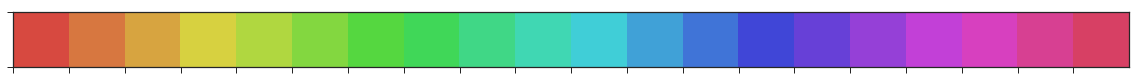

In [94]:
sns.set_style('ticks')
pal_hsl = sns.hls_palette(20, l=.55, s=.66)
sns.palplot(pal_hsl)

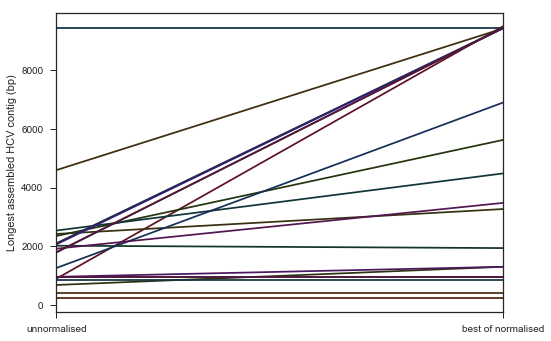

In [76]:
ax = pd.plotting.parallel_coordinates(real[['unnormalised', 'best of normalised', 'id']], 'id', color=pal_hsl)
ax.legend_.remove()
ax.set(ylabel='Longest assembled HCV contig (bp)')
ax.grid(False)

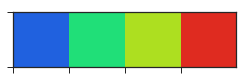

In [69]:
pal_hsl_rev = list(reversed(sns.hls_palette(5, l=.5, s=.75).as_hex()))[1:]
sns.palplot(pal_hsl_rev)

In [70]:
pal_hsl_rev

['#2061df', '#20df78', '#addf20', '#df2b20']

### Figure

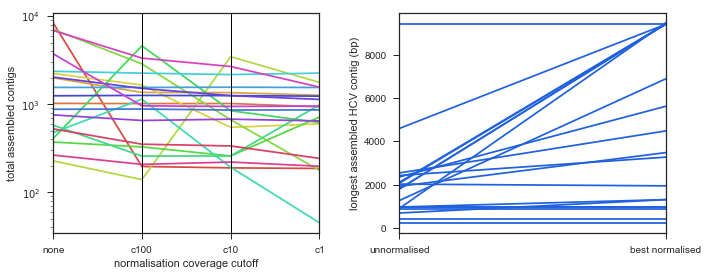

In [121]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
pd.plotting.parallel_coordinates(df, 'id', color=pal_hsl, ax=ax1)
pd.plotting.parallel_coordinates(real[['unnormalised', 'best normalised', 'id']], 'id', color='#2061df', ax=ax2)

ax1.set(xlabel='normalisation coverage cutoff', ylabel='total assembled contigs')
ax2.set(ylabel='longest assembled HCV contig (bp)')

# ax1.yscale('log')
ax1.set_yscale('log')

ax1.legend_.remove()
ax2.legend_.remove()

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)

ax1.grid(False)
ax2.grid(False)

fig.savefig("hcv_meta_norm_eval.pdf")

In [132]:
ids_dirs

{'g1': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g1_no-qtrim_norm-c1c10c100k21k31_1.f',
 'g10': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g10_no-qtrim_norm-c1c10c100k21k31_10.f',
 'g2': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g2_no-qtrim_norm-c1c10c100k21k31_2.f',
 'g3': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g3_no-qtrim_norm-c1c10c100k21k31_3.f',
 'g4': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g4_no-qtrim_norm-c1c10c100k21k31_4.f',
 'g5': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g5_no-qtrim_norm-c1c10c100k21k31_5.f',
 'g6': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g6_no-qtrim_norm-c1c10c100k21k31_6.f',
 'g7': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g7_no-qtrim_norm-c1c10c100k21k31_7.f',
 'g8': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g8_no-qtrim_norm-c1c10c100k21k31_8.f',
 'g9': '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_

In [75]:
def longest_record_from_multiple_assemblies(assembly_root):
    '''Returns SeqRecord of longest sequence inside `contigs.fasta` files in a specified directory'''
    assembly_paths = []
    for root, dirs, fns in os.walk(assembly_root):
        for fn in fns:
            if fn == 'contigs.fasta':
                 assembly_paths.append(os.path.join(root, fn))

    longest_len = 0
    for path in assembly_paths:
        records = SeqIO.parse(path, 'fasta')
        for record in records:
            if len(record.seq) > longest_len:
                longest_id = record.id
                longest_len = len(record.seq)
                longest_assembly = path
                longest_record = record
                longest_record.description = path
    
    return longest_record

# for p in p1:
#     print(longest_record_from_multiple_assemblies(p), '\n')

In [83]:
longest_record_from_multiple_assemblies(path + '/' +'g2_no-qtrim_norm-c1c10c100k21k31_2.f/asm')

SeqRecord(seq=Seq('CGCGACTCCAAGATCGATGTGTGGAGTTTGGTGCCAGTTGGCTCTGCCAGCTGT...CGG', SingleLetterAlphabet()), id='NODE_1_length_7592_cov_15.942', name='NODE_1_length_7592_cov_15.942', description='/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g2_no-qtrim_norm-c1c10c100k21k31_2.f/asm/2.f.no_norm.asm_k/contigs.fasta', dbxrefs=[])

In [81]:
reference_file = 'res/2017-09-03/h77.fa'
query_file = '/Users/bede/Research/Notebooks/res/2017-09-03/venorm_out/g1_no-qtrim_norm-c1c10c100k21k31_1.f/asm/1.f.no_norm.asm_k/contigs.fasta'
results_file = 'res/2017-09-03/res.out'

runner = nucmer.Runner(reference_file, query_file, results_file, breaklen=1000) 
runner.run()
file_reader = coords_file.reader(results_file)
alignments = [coord for coord in file_reader if not coord.is_self_hit()]

for a in alignments:
    print(a.__dict__)
    print('rcov:', round(a.hit_length_qry/a.ref_length, 4))
    print('qcov:', round(a.hit_length_ref/a.qry_length, 4))
    print('id:', round(a.percent_identity/100, 4))

{'ref_start': 422, 'ref_end': 662, 'qry_start': 76, 'qry_end': 316, 'hit_length_ref': 241, 'hit_length_qry': 241, 'percent_identity': 91.74, 'ref_length': 9646, 'qry_length': 317, 'frame': 1, 'ref_name': 'gi|22129792|ref|NC_004102.1|', 'qry_name': 'NODE_94_length_317_cov_1.4375'}
rcov: 0.025
qcov: 0.7603
id: 0.9174


In [ ]:
# Top contig

iva_top_contigs = {}
for id in ids:
    reference_file = f'{r_root}/gold/{id}.fa'
    query_file = f'{r_root}/iva/iva_vol/assembled/{id}/contigs.fasta'
    results_file = f'{r_root}/eval/iva/{id}.mum'

    runner = nucmer.Runner(reference_file, query_file, results_file, breaklen=10000) 
    runner.run()
    file_reader = coords_file.reader(results_file)
    alignments = [coord for coord in file_reader if not coord.is_self_hit()]

    for a in alignments:
        if (id not in iva_top_contigs 
            or a.hit_length_ref/a.ref_length > iva_top_contigs[id]['rcov']):
            iva_top_contigs[id] = dict(id=id,
                                          rcov=round(a.hit_length_ref/a.ref_length, 4),
                                          qcov=round(a.hit_length_qry/a.qry_length, 4),
                                          identity=round(a.percent_identity/100, 4))

iva_top_contigs_df = pd.DataFrame(list(iva_top_contigs.values()), index=ids)
iva_top_contigs_df